#Task3:
Develop a model to predict customer churn for a subscription-
based service or business. Use historical customer data, including

features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient

Boosting to predict churn.

# Importing necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold,cross_val_predict,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,accuracy_score,classification_report
import xgboost as xgb

import tensorflow as tf
from tensorflow.keras import utils, Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.activations import relu, sigmoid

from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values present.

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# EDA

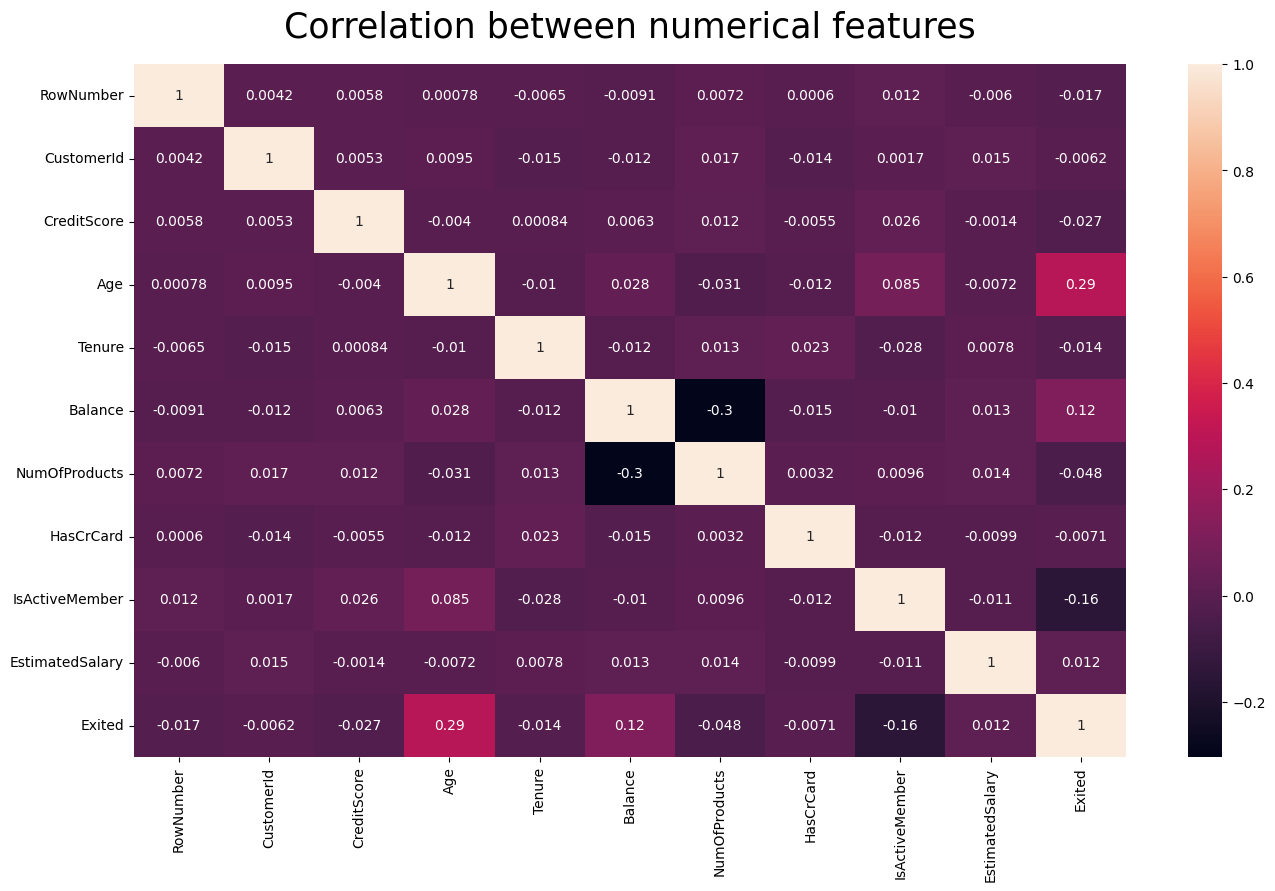

In [9]:
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr()
plt.figure(figsize = [16,9])
plt.title("Correlation between numerical features", size = 25, pad = 20)
sns.heatmap(corr, annot = True)
plt.show()

**Age and Balance are positively correlated with Exited feature.
IsActiveMember is negatively correlated with Exited.**

Text(0.5, 1.0, 'Genders Vs Customers')

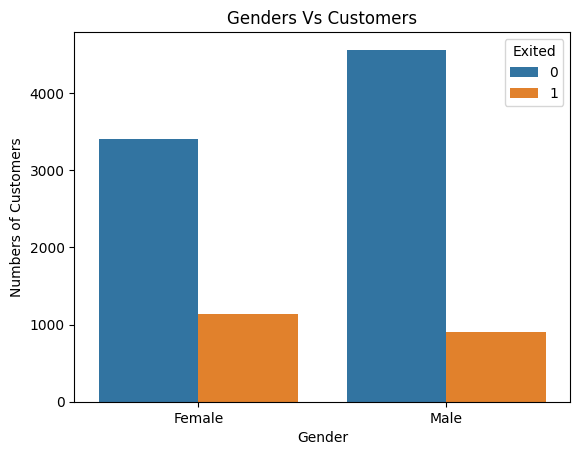

In [10]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.xlabel('Gender')
plt.ylabel('Numbers of Customers')
plt.title("Genders Vs Customers")

**Although the majority of customers are male, there isn't a significant gender-based difference in terms of churning.**

Text(0.5, 1.0, 'Geography Vs Customers')

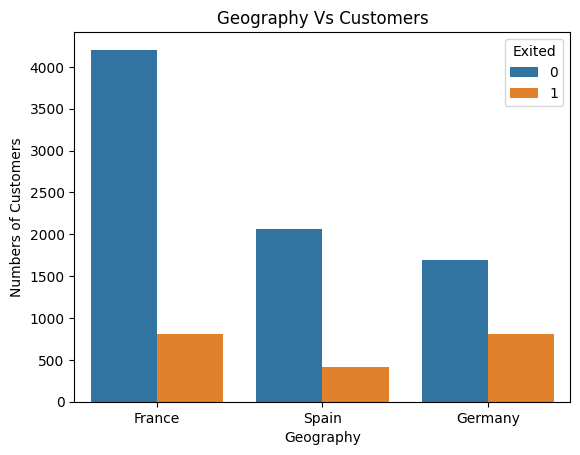

In [11]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.xlabel('Geography')
plt.ylabel('Numbers of Customers')
plt.title("Geography Vs Customers")

**Most of the customers are from France.
Germans and French are more likely to exit.**

# Data preprocessing

In [12]:
df.drop(columns=['Surname', 'CustomerId', 'RowNumber'], inplace=True)
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

**Bar Chart of correlation of different features with "Exited" feature**

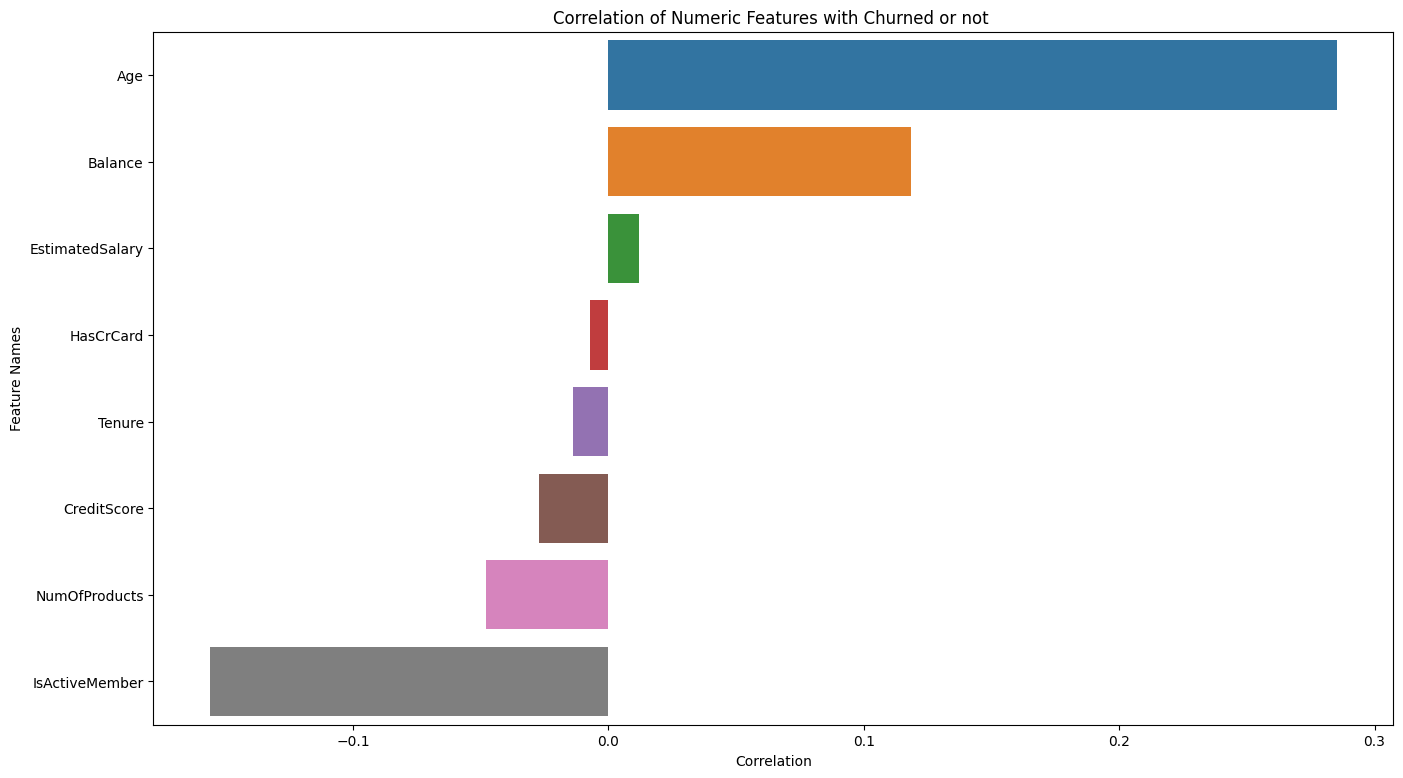

In [13]:
feature_corr = df.drop(columns='Exited').select_dtypes('number').apply(lambda x: x.corr(df['Exited']))
feature_corr = pd.DataFrame(feature_corr,columns = ['Correlation']).sort_values(['Correlation'],ascending = False)
plt.figure(figsize=(16,9))
sns.barplot(x=feature_corr['Correlation'], y=feature_corr.index).set(
title="Correlation of Numeric Features with Churned or not ", xlabel="Correlation",
ylabel="Feature Names")
plt.show()

**Converting into Range of values for some Numerical features**

**TENURE**

In [14]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [15]:
labels = ["{0} - {1}".format(i,i+2) for i in range(0,11,2) ]
labels

['0 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10', '10 - 12']

Text(0.5, 1.0, 'Tenure Vs Churning')

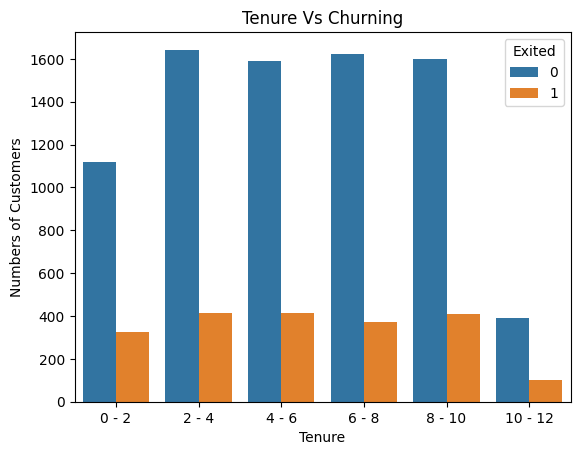

In [16]:
df["TenureGroup"] = pd.cut(df['Tenure'],range(0,13,2),labels =labels,right=False)
sns.countplot(x='TenureGroup',hue='Exited',data=df)
plt.xlabel('Tenure')
plt.ylabel('Numbers of Customers')
plt.title("Tenure Vs Churning")

**AGE**

In [17]:
df.Age.max()

92

Text(0.5, 1.0, 'Age Vs Churning')

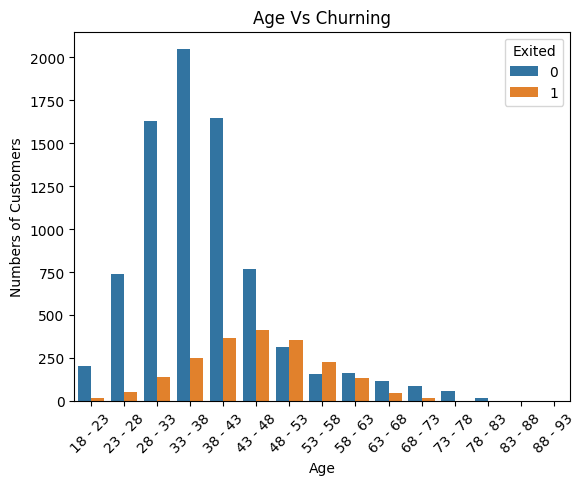

In [18]:
label = ["{0} - {1}".format(i,i+5) for i in range(18,93,5)]
df["AgeGroup"]=pd.cut(df['Age'],range(18,94,5),labels=label,right=False)
sns.countplot(x='AgeGroup',hue='Exited',data=df)
plt.xlabel('Age')
plt.xticks(rotation = 45)
plt.ylabel('Numbers of Customers')
plt.title("Age Vs Churning")

People from age group 43-48 are most likely to churn.

In [19]:
df.drop(columns=['Age',"Tenure"],inplace=True)

**One hot encoding of some categorical variables**

In [20]:
df = pd.get_dummies(df, columns=['Geography', 'Gender','TenureGroup','AgeGroup'], drop_first=True)

**Scaling numerical features because they have widely different range.**

In [21]:
ss = StandardScaler()
numeric_columns = ['CreditScore','Balance','EstimatedSalary']
df[numeric_columns] = ss.fit_transform(df[numeric_columns])

In [22]:
X=df.drop(columns = ['Exited'])
y=df['Exited']

# Training  models

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=420)
print(X_train.shape)
print(X_test.shape)

(7000, 28)
(3000, 28)


In [24]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.849

Confusion Matrix:
 [[2287  111]
 [ 342  260]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2398
           1       0.70      0.43      0.53       602

    accuracy                           0.85      3000
   macro avg       0.79      0.69      0.72      3000
weighted avg       0.84      0.85      0.83      3000



In [25]:
xgb_c = xgb.XGBClassifier()
xgb_c.fit(X_train,y_train)
y_pred_x = xgb_c.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_x)
conf_matrix = confusion_matrix(y_test, y_pred_x)
classification_rep = classification_report(y_test, y_pred_x)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8493333333333334

Confusion Matrix:
 [[2260  138]
 [ 314  288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2398
           1       0.68      0.48      0.56       602

    accuracy                           0.85      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000

